In [1]:
from node import node 
from rb_tree import rb_tree 
from utils import draw
import warnings

warnings.filterwarnings('ignore')

tree = rb_tree()

nodes = []
for i in range(0,23):
    nodes.append(node(i, 1, tree.get_nil(), tree.get_nil(), tree.get_nil()))

In [2]:
def add_fixup(tree, node):
    while node.get_parent().get_color() == tree.red:
        if node.get_parent() == node.get_parent().get_parent().get_left():
            y = node.get_parent().get_parent().get_right()
            if y.get_color() == tree.red:
                node.get_parent().set_color(tree.black)
                y.set_color(tree.black)
                node.get_parent().get_parent().set_color(tree.red)
                node = node.get_parent().get_parent()
            elif node == node.get_parent().get_right():
                node = node.get_parent()
                tree.left_rotate(node.get_parent().get_parent())
            else:
                node.get_parent().set_color(tree.black)
                node.get_parent().get_parent().set_color(tree.red)
                tree.right_rotate(node.get_parent().get_parent())
        else:
            y = node.get_parent().get_parent().get_left()
            if y.get_color() == tree.red:
                node.get_parent().set_color(tree.black)
                y.set_color(tree.black)
                node.get_parent().get_parent().set_color(tree.red)
                node = node.get_parent().get_parent()
            elif node == node.get_parent().get_left():
                node = node.get_parent()
                tree.right_rotate(node.get_parent().get_parent())
            else:
                node.get_parent().set_color(tree.black)
                node.get_parent().get_parent().set_color(tree.red)
                tree.left_rotate(node.get_parent().get_parent())
    tree.get_root().set_color(tree.black)

In [3]:
def add(tree, node):
    y = tree.get_nil()
    x = tree.get_root()
    while x != tree.get_nil():
        y = x
        if node.get_key() < x.get_key():
            x = x.get_left()
        else:
            x = x.get_right()
    node.set_parent(y)
    if y == tree.get_nil():
        tree.set_root(node)
    elif node.get_key() < y.get_key():
        y.set_left(node)
    else:
        y.set_right(node)
    
    node.set_left(tree.get_nil())
    node.set_right(tree.get_nil())
    node.set_color(tree.red)
    
    add_fixup(tree, node)

In [4]:
for i in range(0,23):
    add(tree, nodes[i])

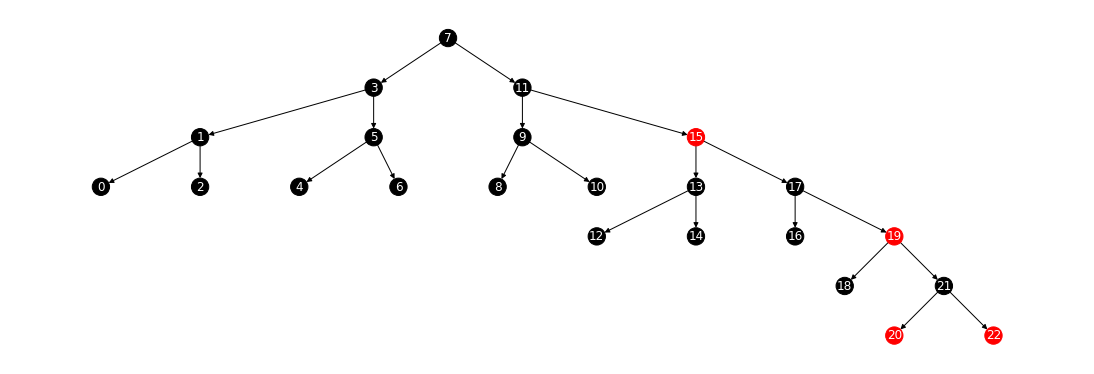

In [5]:
draw(tree)